In [830]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [831]:
path = 'testFileForClassificationWithRegularization.txt'
data = pd.read_csv(path, header=None, names=['Test.1', 'Test.2', 'Accepted'])

In [832]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

Text(0, 0.5, 'Test 2 Score')

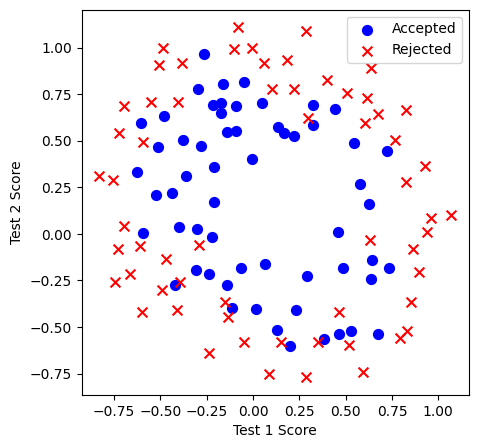

In [833]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Test.1'], positive['Test.2'], s=50, marker='o', c='b', label='Accepted')
ax.scatter(negative['Test.1'], negative['Test.2'], s=50, marker='x', c='r', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [834]:
x1 = data.iloc[:, 0:1].values
x2 = data.iloc[:, 1:2].values

for i in range(1,5):
    for j in range(i):
        data[f'F{i}{j}'] = np.power(x1, i-j) * np.power(x2, j)

data.drop('Test.1', axis=1, inplace=True)
data.drop('Test.2', axis=1, inplace=True)

data.insert(1, 'Ones', 1)

X = np.array(data.iloc[:, 1:].values)
Y = np.array(data.iloc[:, 0:1].values)
theta = np.zeros(X.shape[1])

In [835]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costReg(theta,X , Y, lr):
    theta = np.matrix(theta)
    first = np.multiply(Y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1-Y), np.log(1- sigmoid(X * theta.T)))
    reg = lr/2 * len(X) * np.sum(np.power(theta[:, 1:], 2))
    return (-1/len(X)) * np.sum(first + second) + reg

def gradientReg(theta,X , Y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    grad = np.zeros(theta.shape[1])
    error = sigmoid(X * theta.T)-Y
    for i in range(theta.shape[1]):
        term = np.sum(np.multiply(error, X[:,i]))
        if i == 0:
            grad[i] = term / len(X)
        else :
            grad[i] = (term / len(X)) + ((lr / len(X)) * theta[:,i])
    return grad

def predict(X , theta):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [836]:
learningRate = 0.00001
result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X,Y,learningRate))
# print(result[0])
# print(costReg(theta, X, Y, learningRate))
# print(costReg(result[0], X, Y, learningRate))

In [837]:
theta_min = np.matrix(result[0])
predictions = predict(X , theta_min)
correct = [1 if a==b else 0 for (a,b) in zip(predictions, Y)]
accuracy = (sum(map(int, correct)) % len(correct))
print(f'the accuracy: {accuracy}%')

the accuracy: 86%
